In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [2]:
#data pre processing 
#removing nan values, filling nan values with mean, filling nan values with median
dataset=pd.read_csv('E:\MACHINE LEARNING\churn_data.csv')
print("initial length of dataset "+str(len(dataset.columns)))
print("initial columns of dataset")
print(dataset.columns)
print("initial null values in dataset")
print(dataset.isna().any())
print("initial null values count in each column")
print(dataset.isna().sum())
data_with_mean = dataset.fillna(dataset.mean())
print("initial dataset head:")
print(dataset.head())
print("initial mean filled dataset head: ")
print(data_with_mean.head())
data_with_median = dataset.fillna(dataset.median())
print("initial median filled dataset head: \n")
print(data_with_median.head())
data_without_nan = dataset.drop(columns=['credit_score'])
data_without_nan = data_without_nan[pd.notnull(data_without_nan['age'])]
data_without_nan = data_without_nan[pd.notnull(data_without_nan['rewards_earned'])]
print("initial removed nan values dataset head: \n")
print(data_without_nan.head())
data_without_nan = pd.get_dummies(data_without_nan)
data_without_nan = data_without_nan.drop(columns=['housing_na','payment_type_na','zodiac_sign_na'])
print("columns of dataset without nan:"+str(len(data_without_nan.columns)))
data_with_mean = pd.get_dummies(data_with_mean)
data_with_mean = data_with_mean.drop(columns=['housing_na','payment_type_na','zodiac_sign_na'])
print("columns of dataset with mean: "+str(len(data_with_mean.columns)))
print("rows in data without nan "+str(len(data_without_nan)))
print("rows in data with mean "+str(len(data_with_mean)))
data_with_median = pd.get_dummies(data_with_median)
data_with_median = data_with_median.drop(columns=['housing_na','payment_type_na','zodiac_sign_na'])
print("rows in data with median "+str(len(data_with_median.columns)))

initial length of dataset 31
initial columns of dataset
Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')
initial null values in dataset
user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended    

rows in data with median 46


In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegressionCV

In [7]:
#normalization of data 
#with nan
data_without_nan=data_without_nan.drop(columns=['user'],axis=1)
churn_without_nan = data_without_nan['churn']
data_without_nan=data_without_nan.drop(columns=['churn'],axis=1)
normalized_data_without_nan = preprocessing.normalize(data_without_nan)
#with mean
data_with_mean=data_with_mean.drop(columns=['user'],axis=1)
churn_with_mean = data_with_mean['churn']
data_with_mean=data_with_mean.drop(columns=['churn'],axis=1)
normalized_data_with_mean = preprocessing.normalize(data_with_mean)
#with median
data_with_median=data_with_median.drop(columns=['user'],axis=1)
churn_with_median = data_with_median['churn']
data_with_median=data_with_median.drop(columns=['churn'],axis=1)
normalized_data_with_median = preprocessing.normalize(data_with_median)

In [8]:
#shape after normalization and removal of columns
print("with mean")
print(normalized_data_with_mean.shape)
print("without nan")
print(normalized_data_without_nan.shape)
print("with median")
print(normalized_data_with_median.shape)


with mean
(27000, 44)
without nan
(23773, 43)
with median
(27000, 44)


In [8]:
#PCA without nan
pca = PCA(n_components=0.9999, svd_solver='full')
pca.fit(normalized_data_without_nan)
pca_data_without_nan=pca.transform(normalized_data_without_nan)
print("without nan")
print(pca_data_without_nan.shape)
#with mean
pca.fit(normalized_data_with_mean)
pca_data_with_mean=pca.transform(normalized_data_with_mean)
print("with mean")
print(pca_data_with_mean.shape)
#with median
pca.fit(normalized_data_with_median)
pca_data_with_median=pca.transform(normalized_data_with_median)
print("with mean")
print(pca_data_with_median.shape)

without nan
(23773, 35)
with mean
(27000, 24)
with mean
(27000, 24)


In [29]:
#pca
x_train_without_nan, x_test_without_nan, y_train_without_nan, y_test_without_nan = train_test_split(data_without_nan, churn_without_nan, test_size=0.10, random_state=0)
x_train_with_mean, x_test_with_mean, y_train_with_mean, y_test_with_mean = train_test_split(data_with_mean, churn_with_mean, test_size=0.10, random_state=0)
x_train_with_median, x_test_with_median, y_train_with_median, y_test_with_median = train_test_split(data_with_median, churn_with_median, test_size=0.10, random_state=0)
#without pca
#x_train_without_nan, x_test_without_nan, y_train_without_nan, y_test_without_nan = train_test_split(normalized_data_without_nan, churn_without_nan, test_size=0.10, random_state=0)
#x_train_with_mean, x_test_with_mean, y_train_with_mean, y_test_with_mean = train_test_split(normalized_data_with_mean, churn_with_mean, test_size=0.10, random_state=0)
#x_train_with_median, x_test_with_median, y_train_with_median, y_test_with_median = train_test_split(normalized_data_with_median, churn_with_median, test_size=0.10, random_state=0)
#

In [14]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.metrics import precision_recall_curve

In [40]:
lr = LogisticRegressionCV(max_iter=10000)
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6451851851851852


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6481481481481481


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6425567703952901


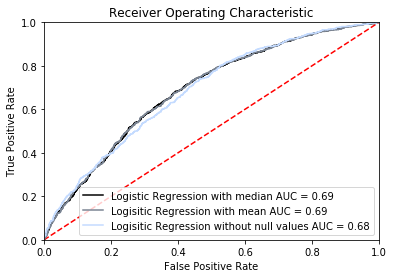

In [41]:

lr.fit(x_train_with_median, y_train_with_median)
predictions = lr.predict(x_test_with_median)
score = lr.score(x_test_with_median, y_test_with_median)
print(score)
probs = lr.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

#plt.figure(figsize=(6,3))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='#635a33', label = 'Logistic Regression with median AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()

lr.fit(x_train_with_mean, y_train_with_mean)
predictions = lr.predict(x_test_with_mean)
score = lr.score(x_test_with_mean, y_test_with_mean)
print(score)
probs = lr.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt


plt.plot(fpr, tpr, color='#7a8493', label = 'Logisitic Regression with mean AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
lr.fit(x_train_without_nan, y_train_without_nan)
predictions = lr.predict(x_test_without_nan)
score = lr.score(x_test_without_nan, y_test_without_nan)
print(score)
probs = lr.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt


plt.plot(fpr, tpr, color='#c4dbff', label = 'Logisitic Regression without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
#plt.show()

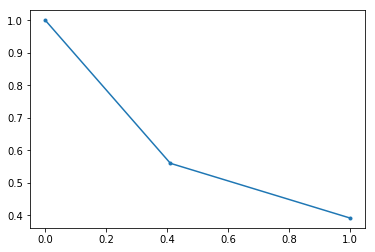

In [28]:
#print(lr.coef_)
#precision, recall, thresholds = precision_recall_curve(y_test_without_nan, predictions)
#plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
#plt.plot(recall, precision, marker='.')
#plt.title("")
# show the plot
#plt.show()

In [54]:
#lr.fit(x_train_with_mean, y_train_with_mean)
#predictions = lr.predict(x_test_with_mean)
#score = lr.score(x_test_with_mean, y_test_with_mean)
#print(accuracy_score(y_test_with_mean, predictions))
#print(score)
#print(lr.coef_)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6481481481481481


In [53]:
#lr.fit(x_train_with_median, y_train_with_median)
#predictions = lr.predict(x_test_with_median)
#print(accuracy_score(y_test_with_median, predictions))

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6451851851851852


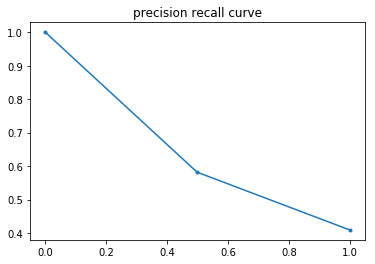

In [30]:
#precision, recall, thresholds = precision_recall_curve(y_test_with_mean, predictions)
#plt.plot(recall, precision, marker='.')
#plt.title("precision recall curve")
#plt.show()

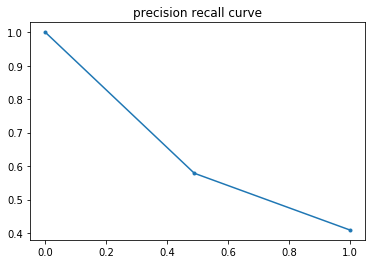

In [32]:
#precision, recall, thresholds = precision_recall_curve(y_test_with_median, predictions)
#plt.plot(recall, precision, marker='.')
#plt.title("precision recall curve")
#plt.show()

In [52]:
#lr.fit(x_train_without_nan, y_train_without_nan)
#predictions = lr.predict(x_test_without_nan)
#print(accuracy_score(y_test_without_nan, predictions))
#print(lr.coef_)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6425567703952901


In [32]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',probability=True) 
#from sklearn.metrics import accuracy_score

C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


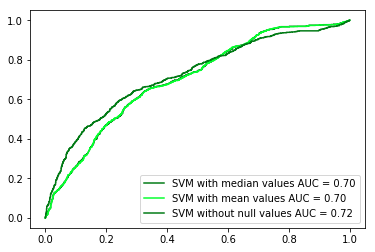

In [43]:

#clf.fit(x_train_without_nan, y_train_without_nan)
#y_pred = clf.predict(x_test_without_nan)
#print("Test Data Accuracy for SVM with gaussian kernel: %0.4f" % accuracy_score(y_test_without_nan, y_pred))

clf.fit(x_train_with_median, y_train_with_median)
#predictions = clf.predict(x_test_with_median)
#score = clf.score(x_test_with_median, y_test_with_median)
#print(score)
probs = clf.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,color='#017a15', label = 'SVM with median values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


clf.fit(x_train_with_mean, y_train_with_mean)
#predictions = clf.predict(x_test_with_median)
#score = clf.score(x_test_with_median, y_test_with_median)
#print(score)
probs = clf.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,color='#05ff2e', label = 'SVM with mean values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')




clf.fit(x_train_without_nan, y_train_without_nan)
#predictions = clf.predict(x_test_with_median)
#score = clf.score(x_test_with_median, y_test_with_median)
#print(score)
probs = clf.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,color='##020405', label = 'SVM without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])


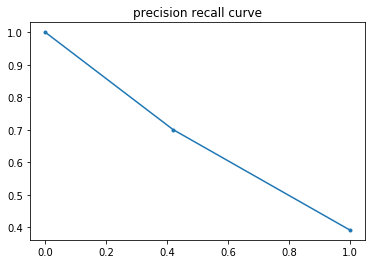

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test_without_nan, y_pred)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

In [37]:
clf = SVC(kernel='rbf') 
clf.fit(x_train_with_mean, y_train_with_mean)
y_pred = clf.predict(x_test_with_mean)
print("Test Data Accuracy for SVM with gaussian kernel: %0.4f" % accuracy_score(y_test_with_mean, y_pred))

C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Data Accuracy for SVM with gaussian kernel: 0.6419


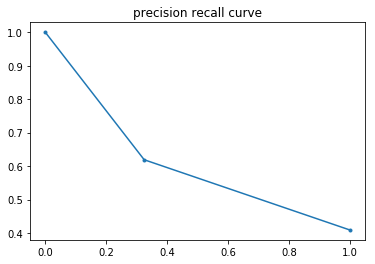

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test_with_mean, y_pred)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

In [40]:
clf = SVC(kernel='rbf') 
clf.fit(x_train_with_median, y_train_with_median)
y_pred = clf.predict(x_test_with_median)
print("Test Data Accuracy for SVM with gaussian kernel: %0.4f" % accuracy_score(y_test_with_median, y_pred))

C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Data Accuracy for SVM with gaussian kernel: 0.6419


In [44]:
from sklearn.neural_network import MLPClassifier



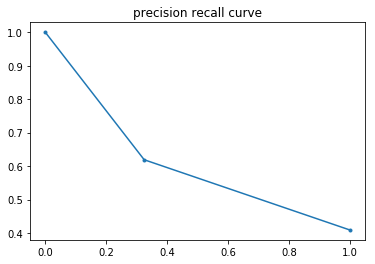

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test_with_median, y_pred)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

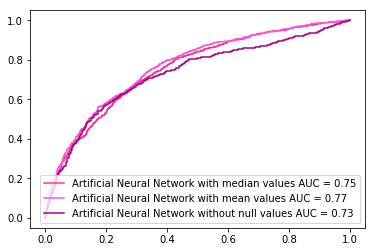

In [45]:
mlp = MLPClassifier(hidden_layer_sizes=(35, 35, 35,35,35,35,35), max_iter=10000)  
mlp.fit(x_train_with_median, y_train_with_median)
#predictions = mlp.predict(x_test_without_nan)
mlp.fit(x_train_with_median, y_train_with_median)
probs = mlp.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#ff328b', label = 'Artificial Neural Network with median values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


mlp.fit(x_train_with_mean, y_train_with_mean)
#predictions = mlp.predict(x_test_without_nan)
mlp.fit(x_train_with_mean, y_train_with_mean)
probs = mlp.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#ff54df', label = 'Artificial Neural Network with mean values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



mlp.fit(x_train_without_nan, y_train_without_nan)
#predictions = mlp.predict(x_test_without_nan)
mlp.fit(x_train_without_nan, y_train_without_nan)
probs = mlp.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#a30085', label = 'Artificial Neural Network without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



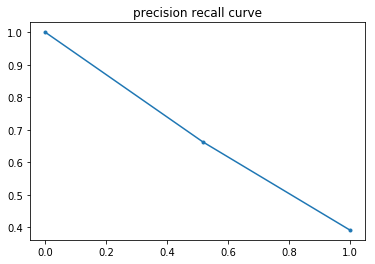

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test_without_nan, predictions)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

In [45]:
mlp = MLPClassifier(hidden_layer_sizes=(35, 35, 35,35,35,35,35), max_iter=100000)  
mlp.fit(x_train_with_mean, y_train_with_mean)
predictions = mlp.predict(x_test_with_mean)
print(accuracy_score(y_test_with_mean, predictions))
#print(classification_report(y_test_without_nan,predictions))

0.7085185185185185


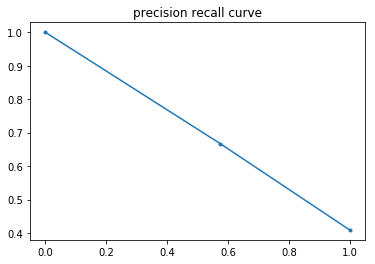

In [46]:
precision, recall, thresholds = precision_recall_curve(y_test_with_mean, predictions)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

In [47]:
mlp = MLPClassifier(hidden_layer_sizes=(35, 35, 35,35,35,35,35), max_iter=100000)  
mlp.fit(x_train_with_median, y_train_with_median)
predictions = mlp.predict(x_test_with_median)
print(accuracy_score(y_test_with_median, predictions))
#print(classification_report(y_test_without_nan,predictions))

0.6948148148148148


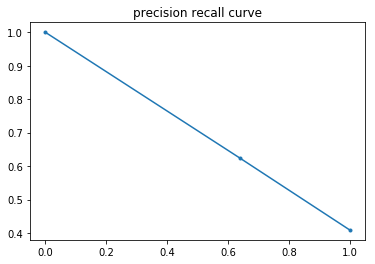

In [48]:
precision, recall, thresholds = precision_recall_curve(y_test_with_median, predictions)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

[array([[ 2.16763754e-001, -3.03440061e-316, -1.46561920e-001,
          1.09826342e-001,  3.02158781e-001, -3.32667510e-315,
          3.80097700e-316, -8.60616274e-316,  1.89204201e-001,
         -2.28971846e-315, -3.59654577e-315, -3.04084077e-315,
          2.96025025e-001,  1.79071159e-001,  3.35440818e-001,
          3.22166864e-001, -2.27524466e-002,  1.67113750e-001,
         -3.55274530e-315,  1.04531197e-001,  3.60924441e-001,
          1.49514761e-003,  3.78502011e-001, -3.00291325e-315,
          3.86894983e-001,  1.02758185e-001,  1.41699535e-001,
          4.19908606e-001, -9.65234162e-003,  1.13444102e-108,
         -7.74153015e-217, -2.14067601e-001,  3.36494077e-315,
          2.01582241e-001,  2.09046113e-001],
        [ 7.94528122e-001, -3.61020951e-315,  3.95454862e-001,
         -1.05027887e-001, -7.77750510e-001, -2.01353509e-316,
         -1.11890623e-315, -3.42777076e-315,  1.22562248e+000,
          4.12003632e-315,  8.32221382e-316,  1.86624231e-315,
         

In [35]:
from sklearn.ensemble import VotingClassifier

In [39]:
estimators=[('clf', clf), ('mlp', mlp), ('lr', lr)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(x_train_without_nan, y_train_without_nan)
ensemble.score(x_test_without_nan, y_test_without_nan)

C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7094196804037006

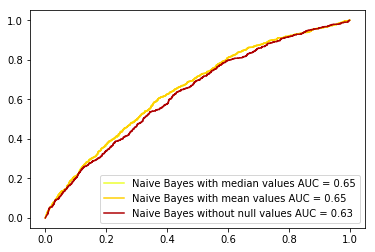

In [49]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train_with_median,y_train_with_median)
probs = model.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#727172', label = 'Naive Bayes with median values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



model.fit(x_train_with_mean,y_train_with_mean)
probs = model.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#ffd002', label = 'Naive Bayes with mean values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



model.fit(x_train_without_nan,y_train_without_nan)
probs = model.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#af0002', label = 'Naive Bayes without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


In [48]:
plt.show()

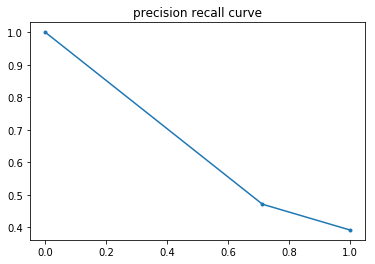

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test_without_nan, predicted)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

In [17]:
model = GaussianNB()
# Train the model using the training sets
model.fit(x_train_with_mean,y_train_with_mean)
#Predict Output
predicted= model.predict(x_test_with_mean) 
print(accuracy_score(y_test_with_mean, predicted))

0.585925925925926


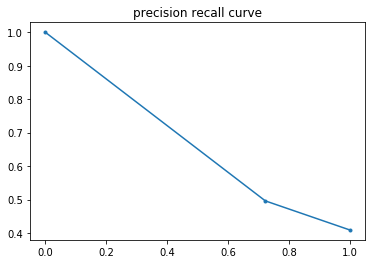

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test_with_mean, predicted)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")
plt.show()

0.5855555555555556


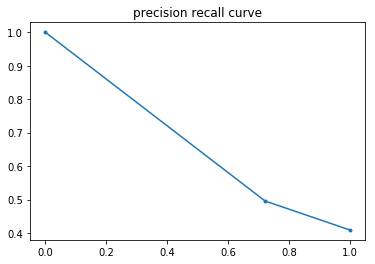

In [19]:
model = GaussianNB()
# Train the model using the training sets
model.fit(x_train_with_median,y_train_with_median)
#Predict Output
predicted= model.predict(x_test_with_median) 
print(accuracy_score(y_test_with_mean, predicted))
precision, recall, thresholds = precision_recall_curve(y_test_with_median, predicted)
plt.plot(recall, precision, marker='.')
plt.title("precision recall curve")

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6451851851851852


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6481481481481481


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6425567703952901


C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


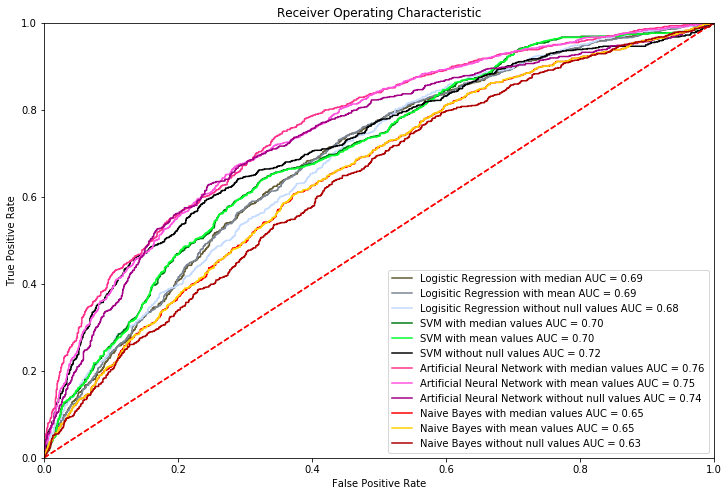

In [74]:


lr.fit(x_train_with_median, y_train_with_median)
predictions = lr.predict(x_test_with_median)
score = lr.score(x_test_with_median, y_test_with_median)
print(score)
probs = lr.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

#plt.figure(figsize=(6,3))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='#635a33', label = 'Logistic Regression with median AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()

lr.fit(x_train_with_mean, y_train_with_mean)
predictions = lr.predict(x_test_with_mean)
score = lr.score(x_test_with_mean, y_test_with_mean)
print(score)
probs = lr.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt


plt.plot(fpr, tpr, color='#7a8493', label = 'Logisitic Regression with mean AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
lr.fit(x_train_without_nan, y_train_without_nan)
predictions = lr.predict(x_test_without_nan)
score = lr.score(x_test_without_nan, y_test_without_nan)
print(score)
probs = lr.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt


plt.plot(fpr, tpr, color='#c4dbff', label = 'Logisitic Regression without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')




#clf.fit(x_train_without_nan, y_train_without_nan)
#y_pred = clf.predict(x_test_without_nan)
#print("Test Data Accuracy for SVM with gaussian kernel: %0.4f" % accuracy_score(y_test_without_nan, y_pred))

clf.fit(x_train_with_median, y_train_with_median)
#predictions = clf.predict(x_test_with_median)
#score = clf.score(x_test_with_median, y_test_with_median)
#print(score)
probs = clf.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,color='#017a15', label = 'SVM with median values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


clf.fit(x_train_with_mean, y_train_with_mean)
#predictions = clf.predict(x_test_with_median)
#score = clf.score(x_test_with_median, y_test_with_median)
#print(score)
probs = clf.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,color='#05ff2e', label = 'SVM with mean values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



clf.fit(x_train_without_nan, y_train_without_nan)
#predictions = clf.predict(x_test_with_median)
#score = clf.score(x_test_with_median, y_test_with_median)
#print(score)
probs = clf.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr,color='#020405', label = 'SVM without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])


mlp = MLPClassifier(hidden_layer_sizes=(35, 35, 35,35,35,35,35), max_iter=10000)  
mlp.fit(x_train_with_median, y_train_with_median)
#predictions = mlp.predict(x_test_without_nan)
mlp.fit(x_train_with_median, y_train_with_median)
probs = mlp.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#ff328b', label = 'Artificial Neural Network with median values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


mlp.fit(x_train_with_mean, y_train_with_mean)
#predictions = mlp.predict(x_test_without_nan)
mlp.fit(x_train_with_mean, y_train_with_mean)
probs = mlp.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#ff54df', label = 'Artificial Neural Network with mean values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



mlp.fit(x_train_without_nan, y_train_without_nan)
#predictions = mlp.predict(x_test_without_nan)
mlp.fit(x_train_without_nan, y_train_without_nan)
probs = mlp.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#a30085', label = 'Artificial Neural Network without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')


from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train_with_median,y_train_with_median)
probs = model.predict_proba(x_test_with_median)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_median, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='r', label = 'Naive Bayes with median values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



model.fit(x_train_with_mean,y_train_with_mean)
probs = model.predict_proba(x_test_with_mean)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_with_mean, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#ffd002', label = 'Naive Bayes with mean values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')



model.fit(x_train_without_nan,y_train_without_nan)
probs = model.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#af0002', label = 'Naive Bayes without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [72]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 

 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

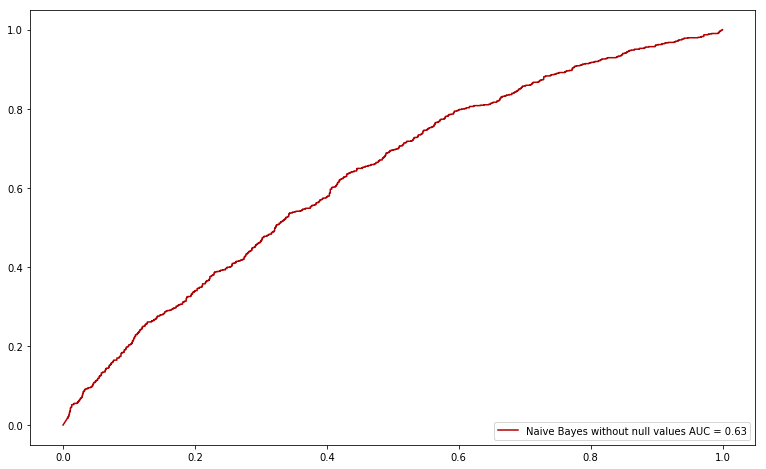

In [71]:
probs = model.predict_proba(x_test_without_nan)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_without_nan, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,color='#af0002', label = 'Naive Bayes without null values AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [75]:
plt.show()